In [1]:
import os
import re
import math
import matplotlib.pyplot as plt
from statistics import mean, stdev

In [2]:
def read_subject_nlls(data_folder):
    subject_nlls = {}
    for subject_id in os.listdir(data_folder):
        subdir = os.path.join(data_folder, subject_id)
        if not os.path.isdir(subdir):
            # We're looking for directories only. Skip everything else
            continue
        fold_nlls = []
        # Get nlls for all the folds
        for filename in os.listdir(subdir):
            filepath = os.path.join(subdir, filename)
            match = re.match("lltest\\d+\\.csv", filename)
            if not os.path.isfile(filepath) or not match:
                # Skip any file that doesn't fit the pattern
                continue
            for line in open(filepath):
                fold_nlls.append(float(line))
        # Use the average nll over all moves
        if len(fold_nlls) > 0:
            subject_nlls[subject_id] = mean(fold_nlls)
    return subject_nlls

def get_diffs(model1, model2, label):
    diffs = []
    missing = max(0, len(model2) - len(model1))
    for key in model1:
        if not key in model2:
            missing += 1
        else:
            diffs.append(model1[key] - model2[key])
    if missing != 0:
        print(f"Could only find {len(diffs)} differences for {label}. Subjects: {len(model1)} vs {len(model2)}")
    return diffs

In [3]:
def add_model(nlls, names, folder, name):
    data = read_subject_nlls(folder)
    nlls.append(data)
    names.append(name)
    print(f"Read {len(data)} nlls in {folder}")

model_nlls = []
model_names = []

add_model(model_nlls, model_names, "../data/fit_main", "Main")
add_model(model_nlls, model_names, "../data/fit_no_noise", "No noise")
add_model(model_nlls, model_names, "../data/fit_no_feature_drop", "No feature drop")
add_model(model_nlls, model_names, "../data/fit_no_prune", "No pruning")
add_model(model_nlls, model_names, "../data/fit_no_tree", "No tree")
add_model(model_nlls, model_names, "../data/fit_no_scale", "No active scaling")
add_model(model_nlls, model_names, "../data/fit_no_3_row", "No 3-in-a-row")
add_model(model_nlls, model_names, "../data/fit_no_2_con", "No connected 2-in-a-row")
add_model(model_nlls, model_names, "../data/fit_no_center", "No center")
add_model(model_nlls, model_names, "../data/fit_no_4_row", "No 4-in-a-row")
add_model(model_nlls, model_names, "../data/fit_no_2_unc", "No unconnected 2-in-a-row")

Read 157 nlls in ../data/fit_main
Read 90 nlls in ../data/fit_no_noise
Read 156 nlls in ../data/fit_no_feature_drop
Read 156 nlls in ../data/fit_no_prune
Read 157 nlls in ../data/fit_no_tree
Read 156 nlls in ../data/fit_no_scale
Read 156 nlls in ../data/fit_no_3_row
Read 156 nlls in ../data/fit_no_2_con
Read 156 nlls in ../data/fit_no_center
Read 156 nlls in ../data/fit_no_4_row
Read 156 nlls in ../data/fit_no_2_unc


In [4]:
data = read_subject_nlls("../data/fit_main")

In [5]:
# model_colors = ['black'] + ['#A30006'] * 10 + ['#025D8C'] * 6 + ['#519548'] * 5 + ['gray']
model_colors = ['black'] + ['#A30006'] * 10

Could only find 90 differences for No noise. Subjects: 90 vs 157
Could only find 156 differences for No feature drop. Subjects: 156 vs 157
Could only find 156 differences for No pruning. Subjects: 156 vs 157
Could only find 156 differences for No active scaling. Subjects: 156 vs 157
Could only find 156 differences for No 3-in-a-row. Subjects: 156 vs 157
Could only find 156 differences for No connected 2-in-a-row. Subjects: 156 vs 157
Could only find 156 differences for No center. Subjects: 156 vs 157
Could only find 156 differences for No 4-in-a-row. Subjects: 156 vs 157
Could only find 156 differences for No unconnected 2-in-a-row. Subjects: 156 vs 157


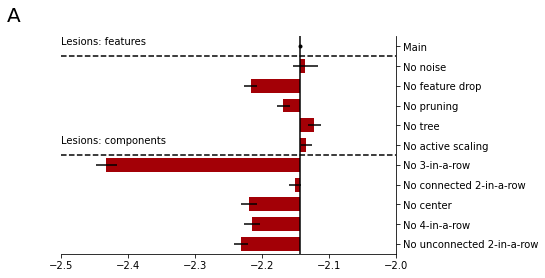

In [6]:
fig, ax = plt.subplots()

loglik_main = -mean(model_nlls[0].values())
loglik_diff = []
loglik_sem  = []
for index in range(len(model_nlls)):
    diffs = get_diffs(model_nlls[index], model_nlls[0], model_names[index])
    loglik_diff.append(-mean(diffs))
    loglik_sem.append(stdev(diffs) / math.sqrt(len(diffs)))


domain = [-2.5,-2.0]

def markSection(ax, label, x, y):
    ax.axhline(y = y-0.5, color='black', linestyle = 'dashed')
    ax.text(x, y, label, ha ='left', va='bottom')

ax.set_ylim([0.5,len(model_names)+0.5])
ax.set_yticks(range(len(model_names),0,-1))
ax.set_yticklabels(model_names)
ax.barh(range(len(model_names),0,-1), loglik_diff,
        xerr = loglik_sem,
        height = 0.7, align='center',
        color = model_colors, ecolor='black', left=loglik_main)
ax.plot(loglik_main, len(model_names),'.k')
ax.axvline(x=loglik_main, color='black')
markSection(ax, 'Lesions: features', domain[0], 11)
markSection(ax, 'Lesions: components', domain[0], 6)
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(domain)
ax.text(0, 0.95, 'A', horizontalalignment='left', verticalalignment='center', transform=fig.transFigure, fontsize = 20)

# fig.tight_layout()
# fig.savefig(direc + 'loglik_rep_A.pdf')
plt.show()